In [1]:
%matplotlib inline

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Import CSV Files
import csv
import os
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities.
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))

66
36
18


In [8]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
# Create three separate dataframes for Urban, Rural and Suburban.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [12]:
# Ride Count for each city by Type (Urban, Rural & Suburban).
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [13]:
# Get average fare for each city by Type (Urban, Rural & Suburban).
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [14]:
# Get average driver count for each city by Type (Urban, Rural & Suburban).
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

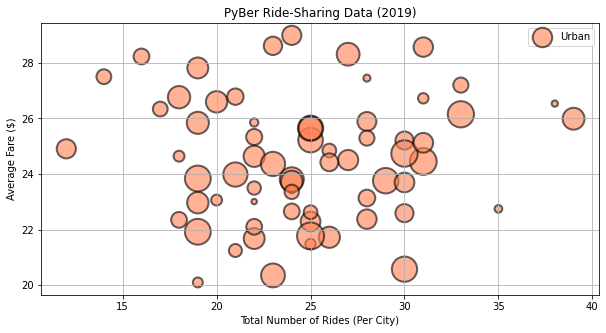

In [15]:
# Build the scatter plots for urban cities.
plt.subplots(figsize=(10, 5))
plt.scatter(urban_ride_count,urban_avg_fare,label = "Urban", 
            color = "coral",s=10*urban_driver_count, edgecolor="black",
           alpha=0.6,linewidths=2)
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

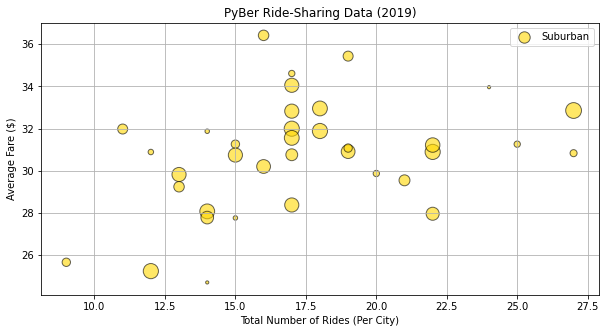

In [16]:
# Build the scatter plots for suburban cities.
plt.subplots(figsize=(10, 5))
plt.scatter(suburban_ride_count,suburban_avg_fare,label = "Suburban", 
            color = "gold",s=10*suburban_driver_count, edgecolor="black",
           alpha=0.6)
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

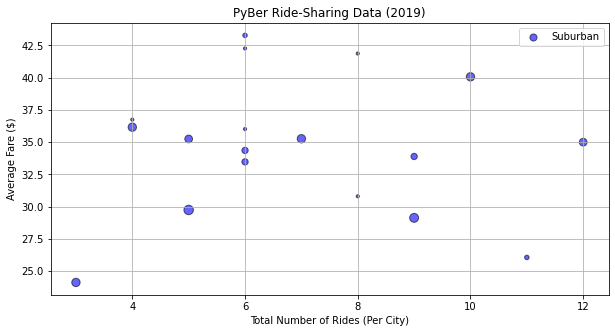

In [17]:
# Build the scatter plots for rural cities.
plt.subplots(figsize=(10, 5))
plt.scatter(rural_ride_count,rural_avg_fare,label = "Suburban", 
            color = "blue",s=10*rural_driver_count, edgecolor="black",
           alpha=0.6)
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

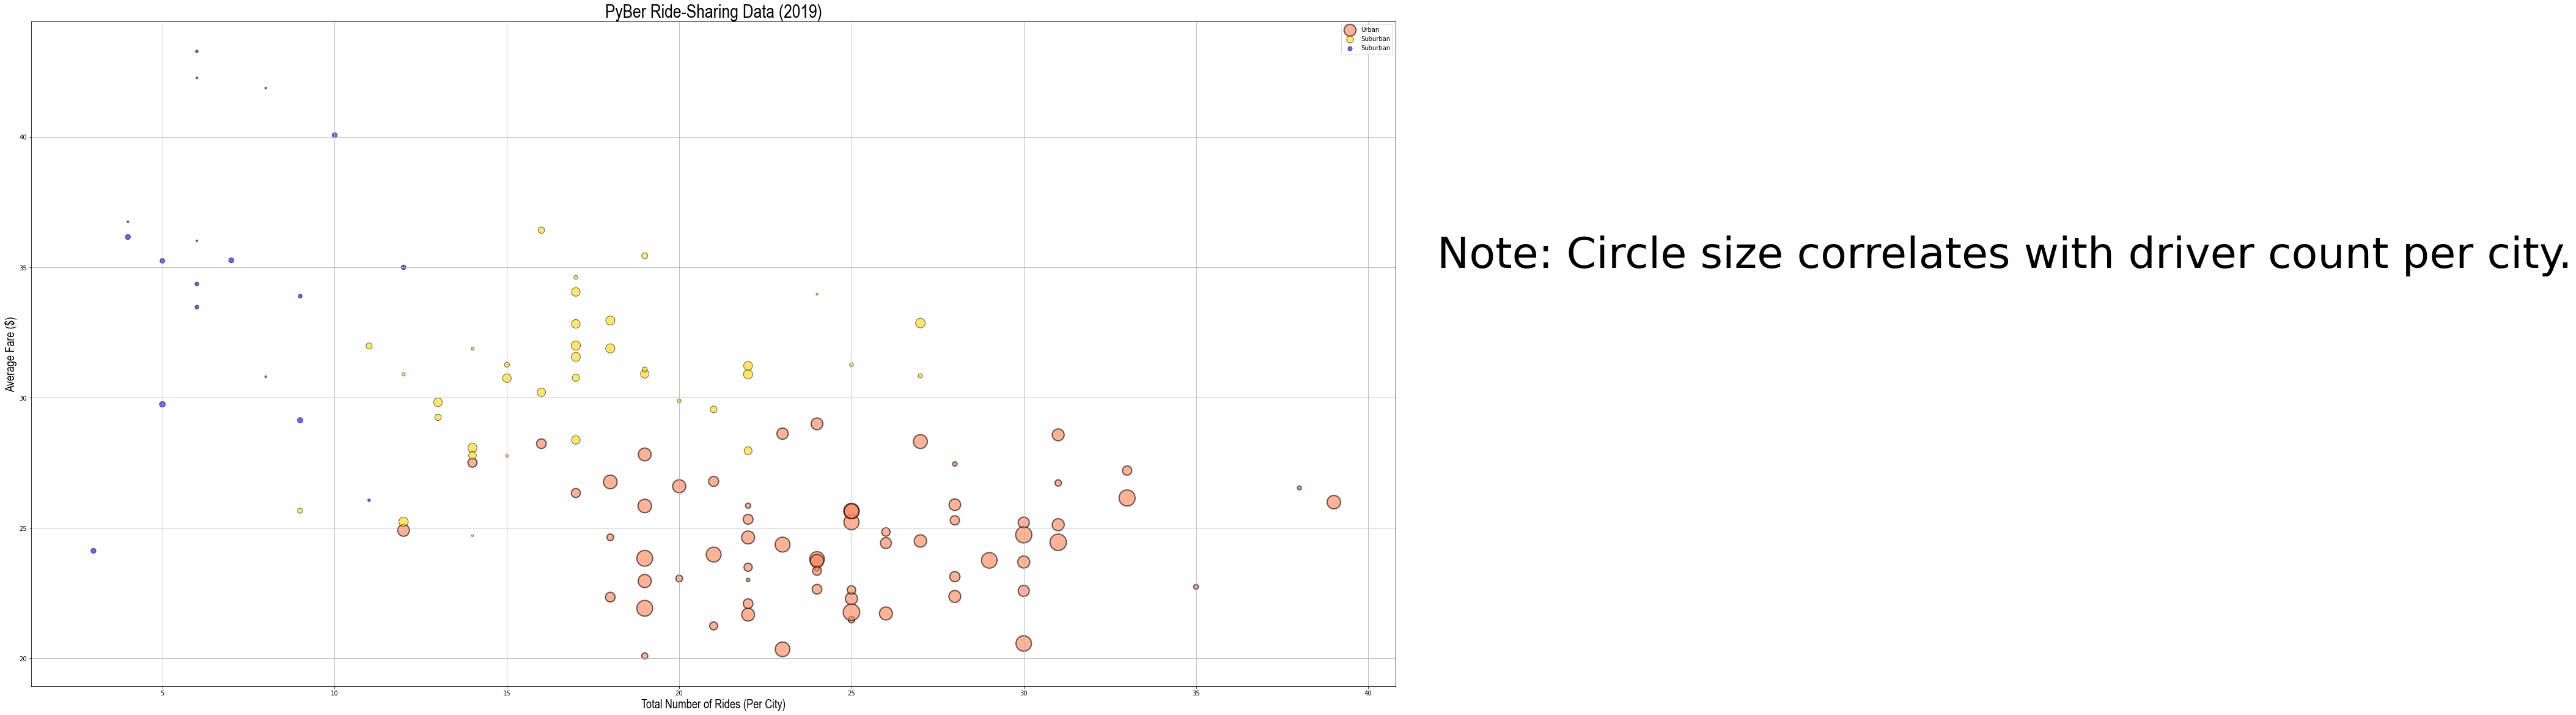

In [20]:
csfont = {'fontname':'Arial Narrow'}

# Build the scatter plots for all three types of cities.
plt.subplots(figsize=(40,20))
plt.scatter(urban_ride_count,urban_avg_fare,label = "Urban", 
            color = "coral",s=10*urban_driver_count, edgecolor="black",
           alpha=0.6,linewidths=2)

plt.scatter(suburban_ride_count,suburban_avg_fare,label = "Suburban", 
            color = "gold",s=10*suburban_driver_count, edgecolor="black",
           alpha=0.6)

plt.scatter(rural_ride_count,rural_avg_fare,label = "Suburban", 
            color = "blue",s=10*rural_driver_count, edgecolor="black",
           alpha=0.6)
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=30, **csfont)
plt.ylabel("Average Fare ($)", fontsize=20, **csfont)
plt.xlabel("Total Number of Rides (Per City)", fontsize=20, **csfont)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="70")
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()